In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df =pd.read_csv(r'G:\data_science_projects\risk\Fraud_detection_and_risk_accessment_Mlops\data\loan_applications.csv')

In [3]:
df.head(2)

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [5]:
df.drop('fraud_type', axis=1, inplace=True)

In [6]:
df.isnull().any()

application_id               False
customer_id                  False
application_date             False
loan_type                    False
loan_amount_requested        False
loan_tenure_months           False
interest_rate_offered        False
purpose_of_loan              False
employment_status            False
monthly_income               False
cibil_score                  False
existing_emis_monthly        False
debt_to_income_ratio         False
property_ownership_status    False
residential_address          False
applicant_age                False
gender                       False
number_of_dependents         False
loan_status                  False
fraud_flag                   False
dtype: bool

In [7]:
df.duplicated().any()

False

In [8]:
df.columns

Index(['application_id', 'customer_id', 'application_date', 'loan_type',
       'loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered',
       'purpose_of_loan', 'employment_status', 'monthly_income', 'cibil_score',
       'existing_emis_monthly', 'debt_to_income_ratio',
       'property_ownership_status', 'residential_address', 'applicant_age',
       'gender', 'number_of_dependents', 'loan_status', 'fraud_flag'],
      dtype='object')

In [9]:
x = df.drop(['application_id', 'application_date', 'interest_rate_offered','residential_address','gender','fraud_flag','loan_status'], axis=1)

In [10]:
x.head(3)

,customer_id,loan_type,loan_amount_requested,loan_tenure_months,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,number_of_dependents
0,CUST109427,Business Loan,604000.0,12,Medical Emergency,Retired,34700.0,714,1100.0,3.17,Rented,28,3
1,CUST106146,Car Loan,100000.0,240,Education,Unemployed,51600.0,667,0.0,0.00,Owned,44,3
2,CUST100674,Education Loan,431000.0,60,Medical Emergency,Self-Employed,14800.0,808,4600.0,31.08,Rented,56,4


In [11]:
y=df['loan_status']

In [12]:
y.head(3)

0    Approved
1    Approved
2    Approved
Name: loan_status, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
x_copy=x.copy()

In [15]:
col=['customer_id','loan_type','purpose_of_loan','employment_status','property_ownership_status']

In [16]:
x_copy.head(3)

,customer_id,loan_type,loan_amount_requested,loan_tenure_months,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,number_of_dependents
0,CUST109427,Business Loan,604000.0,12,Medical Emergency,Retired,34700.0,714,1100.0,3.17,Rented,28,3
1,CUST106146,Car Loan,100000.0,240,Education,Unemployed,51600.0,667,0.0,0.00,Owned,44,3
2,CUST100674,Education Loan,431000.0,60,Medical Emergency,Self-Employed,14800.0,808,4600.0,31.08,Rented,56,4


In [17]:


encoders = {}
for i in col:
    le = LabelEncoder()
    x_encoded = le.fit_transform(x[i])  # Use 'x' if that's your dataframe name
    encoders[i] = le
    x[i] = x_encoded  # Assign back to dataframe 'x'

print("Encoding completed successfully!")
print(x.head())

Encoding completed successfully!
   customer_id  loan_type  loan_amount_requested  loan_tenure_months  \
0         8614          0               604000.0                  12   
1         5619          1               100000.0                 240   
2          610          2               431000.0                  60   
3         5913          1               324000.0                 120   
4        11260          4               100000.0                  36   

   purpose_of_loan  employment_status  monthly_income  cibil_score  \
0                4                  1         34700.0          714   
1                2                  5         51600.0          667   
2                4                  3         14800.0          808   
3                1                  3         28800.0          647   
4                0                  2         43900.0          624   

   existing_emis_monthly  debt_to_income_ratio  property_ownership_status  \
0                 1100.0            

In [18]:
x.head(3)

,customer_id,loan_type,loan_amount_requested,loan_tenure_months,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,number_of_dependents
0,8614,0,604000.0,12,4,1,34700.0,714,1100.0,3.17,2,28,3
1,5619,1,100000.0,240,2,5,51600.0,667,0.0,0.00,1,44,3
2,610,2,431000.0,60,4,3,14800.0,808,4600.0,31.08,2,56,4


In [19]:
y_encoded = le.fit_transform(y)
y_encode=pd.Series(y_encoded)

In [24]:
y.head()

0    Approved
1    Approved
2    Approved
3    Declined
4    Declined
Name: loan_status, dtype: object

In [29]:
y_encode=pd.Series(y_encoded)

In [30]:
y_encode.head()

0    0
1    0
2    0
3    1
4    1
dtype: int32

In [31]:
y_encode.value_counts()

0    40882
1     8092
2      542
3      484
Name: count, dtype: int64

In [36]:
x.head(3)

,customer_id,loan_type,loan_amount_requested,loan_tenure_months,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,number_of_dependents
0,8614,0,604000.0,12,4,1,34700.0,714,1100.0,3.17,2,28,3
1,5619,1,100000.0,240,2,5,51600.0,667,0.0,0.00,1,44,3
2,610,2,431000.0,60,4,3,14800.0,808,4600.0,31.08,2,56,4


In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_scaled=scaler.fit_transform(x)


In [38]:
x_scaled

array([[-0.10023798, -1.41807663,  0.32733919, ...,  1.22583083,
        -1.16119778,  0.70113351],
       [-0.66641025, -0.71068654, -1.50399081, ...,  0.00203151,
         0.0724064 ,  0.70113351],
       [-1.61330739, -0.00329644, -0.3012721 , ...,  1.22583083,
         0.99760953,  1.41098398],
       ...,
       [ 1.71415985, -0.71068654, -0.28310414, ..., -1.22176781,
         0.38080744,  1.41098398],
       [-0.16054147, -1.41807663,  1.13763005, ...,  1.22583083,
         1.4602111 ,  0.70113351],
       [ 0.59731651,  0.70409366, -1.50399081, ...,  0.00203151,
         0.22660692,  0.70113351]])

In [39]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [40]:
x_scaled.head(3)

,customer_id,loan_type,loan_amount_requested,loan_tenure_months,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,applicant_age,number_of_dependents
0,-0.100238,-1.418077,0.327339,-0.900989,0.501681,-0.872180,-0.676242,0.297482,-1.036588,-0.563563,1.225831,-1.161198,0.701134
1,-0.666410,-0.710687,-1.503991,0.976957,-0.498520,1.472673,0.031626,-0.644028,-1.616465,-0.894200,0.002032,0.072406,0.701134
2,-1.613307,-0.003296,-0.301272,-0.505632,0.501681,0.300247,-1.509767,2.180501,0.808473,2.347503,1.225831,0.997610,1.410984


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix, classification_report, roc_auc_score)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_encode,test_size=0.2,random_state=42,stratify=y_encode)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\n=== {model_name} Evaluation ===")
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_encode,test_size=0.2,random_state=42,stratify=y_encode)

In [44]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (40000, 13)
X_test shape: (10000, 13)
y_train shape: (40000,)
y_test shape: (10000,)


In [48]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, log_loss
)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix, classification_report, roc_auc_score)


model1 = LogisticRegression(random_state=42, max_iter=1000)
model1.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [57]:
y_pred=model1.predict(x_test)

In [58]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\n=== {model_name} Evaluation ===")
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    print("Accuracy:", acc)
    print("Macro Precision:", precision)
    print("Macro Recall:", recall)
    print("Macro F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



=== Logistic Regression Evaluation ===
Accuracy: 0.9746
Macro Precision: 0.4869242003918137
Macro Recall: 0.4925834363411619
Macro F1-score: 0.48971375635027575

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      8176
           1       0.97      0.97      0.97      1618
           2       0.00      0.00      0.00       109
           3       0.00      0.00      0.00        97

    accuracy                           0.97     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.95      0.97      0.96     10000



C:\Users\Sarunraj.S\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarunraj.S\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarunraj.S\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

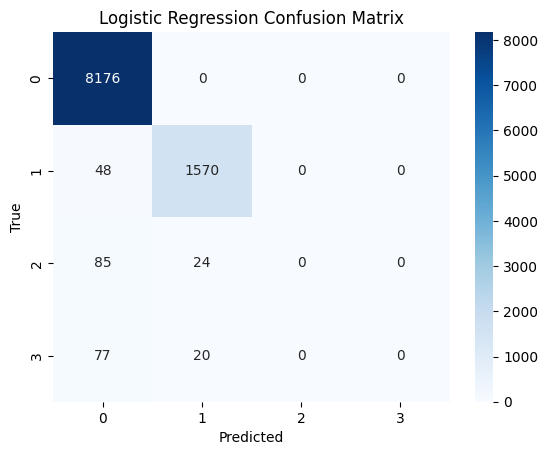

In [59]:
evaluate_model(y_test, y_pred, "Logistic Regression")


=== Random Forest Evaluation ===
Accuracy: 0.9794
Macro Precision: 0.488524188187467
Macro Recall: 0.5
Macro F1-score: 0.49419387688790295

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8176
           1       0.97      1.00      0.99      1618
           2       0.00      0.00      0.00       109
           3       0.00      0.00      0.00        97

    accuracy                           0.98     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.96      0.98      0.97     10000



C:\Users\Sarunraj.S\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarunraj.S\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sarunraj.S\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

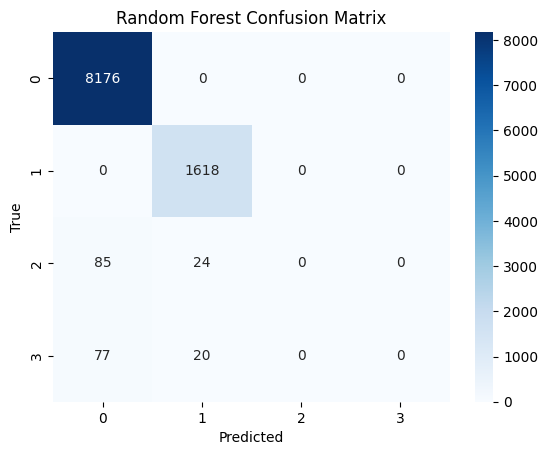

In [61]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

In [63]:
y_pred_train = model1.predict(x_train)

In [70]:
from sklearn.metrics import accuracy_score, log_loss
if hasattr(model1, "predict_proba"):
    loss_train = log_loss(y_train, model1.predict_proba(x_train))
    loss_test = log_loss(y_test, model1.predict_proba(x_test))
else:
    loss_train = None
    loss_test = None
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred)

print("\n=== Overfitting Check ===")
print(f"Train Accuracy: {acc_train:.4f}")
print(f"Test Accuracy:  {acc_test:.4f}")
if loss_train is not None:
    print(f"Train Log Loss: {loss_train:.4f}")
    print(f"Test Log Loss:  {loss_test:.4f}")

# Decision
if acc_train - acc_test > 0.10:
    print("\n🚨 Warning: Possible overfitting (Accuracy gap > 10%)")
else:
    print("\n✅ No significant overfitting detected.")


=== Overfitting Check ===
Train Accuracy: 0.9746
Test Accuracy:  0.9746
Train Log Loss: 0.1614
Test Log Loss:  0.1748

✅ No significant overfitting detected.


In [71]:
from sklearn.metrics import accuracy_score, log_loss
if hasattr(rf, "predict_proba"):
    loss_train = log_loss(y_train, rf.predict_proba(x_train))
    loss_test = log_loss(y_test, rf.predict_proba(x_test))
else:
    loss_train = None
    loss_test = None
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred)

print("\n=== Overfitting Check ===")
print(f"Train Accuracy: {acc_train:.4f}")
print(f"Test Accuracy:  {acc_test:.4f}")
if loss_train is not None:
    print(f"Train Log Loss: {loss_train:.4f}")
    print(f"Test Log Loss:  {loss_test:.4f}")

# Decision
if acc_train - acc_test > 0.10:
    print("\n🚨 Warning: Possible overfitting (Accuracy gap > 10%)")
else:
    print("\n✅ No significant overfitting detected.")


=== Overfitting Check ===
Train Accuracy: 0.9746
Test Accuracy:  0.9746
Train Log Loss: 0.0196
Test Log Loss:  0.2778

✅ No significant overfitting detected.


data ingestion


In [ ]:
import pandas as pd

def data_ingestion(data_path):
    return df=pd.read_csv(data_path)

data preprocessing


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from src.data_ingestion import data_ingestion

def preprocessing(data_path):
    df=data_ingestion(data_path)
    x = df.drop(['application_id', 'application_date', 'interest_rate_offered','residential_address','gender','fraud_flag','loan_status'], axis=1)
    encoders = {}
    for i in col:
        le = LabelEncoder()
        x_encoded = le.fit_transform(x[i])  # Use 'x' if that's your dataframe name
        encoders[i] = le
        x[i] = x_encoded 
    scaler=StandardScaler()
    x_scaled=scaler.fit_transform(x)   
    x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
    y_encoded = le.fit_transform(y)
    y_encode=pd.Series(y_encoded)
    return x_scaled,y_encode

data training


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from src.data_preprocessing import preprocessing

from joblib import dump, load

def model_training(data_path):
    x_scaled,y_encode=preprocessing(data_path)
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_encode,test_size=0.2,random_state=42,stratify=y_encode)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x_train, y_train)
    return dump(model, 'random_forest_model.joblib')
   
    


    


evaluation

In [ ]:
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix, classification_report, roc_auc_score)

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"\n=== {model_name} Evaluation ===")
    acc = accuracy_score(y_true, y_pred)
    return precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

model prediction


In [ ]:
from joblib import dump, load
from src.model_evaluation import evaluation_model

def prediction(data_path):
    loaded_model = load('random_forest_model.joblib')
    y_pred_rf = loaded_model.predict(x_test)
    evaluate_model(y_test, y_pred_rf, "Random Forest")